In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("movies.dat", sep='::', names=['MovieID','Title','Genres'], engine='python')
df1.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df2 = pd.read_csv("users.dat", sep='::', names=['UserID','Gender','Age', 'Occupation', 'zip-code'], engine='python')
df2.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
df3 = pd.read_csv("ratings.dat", sep='::', names=['UserID','MovieID','Rating', 'Timestamp'], engine='python')
df3.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
x=pd.merge(df2,df3,on="UserID")

In [6]:
y=pd.merge(x,df1,on="MovieID")

In [7]:
y.head()

,UserID,Gender,Age,Occupation,zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
y["Age"].unique()

array([ 1, 56, 25, 50, 18, 45, 35])

In [9]:
z=y.groupby("Age").size().reset_index()

In [10]:
z

,Age,0
0,1,27211
1,18,183536
2,25,395556
3,35,199003
4,45,83633
5,50,72490
6,56,38780


In [11]:
z.rename({0:"count"},axis=1,inplace=True)

In [12]:
z.head(2)

,Age,count
0,1,27211
1,18,183536


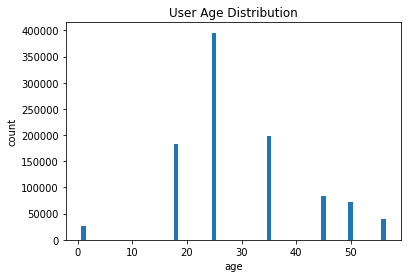

In [13]:
# plt.figure(figsize=(10,10)
plt.bar(z["Age"],z["count"])
plt.title("User Age Distribution")
plt.xlabel("age")
plt.ylabel("count")
plt.show()

In [14]:
z.sort_values("count", ascending=False)[:5].reset_index()

,index,Age,count
0,2,25,395556
1,3,35,199003
2,1,18,183536
3,4,45,83633
4,5,50,72490


In [16]:
y.head()

,UserID,Gender,Age,Occupation,zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [18]:
y["Title"].unique()

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

In [28]:
# Top 25 movies by viewership rating

In [34]:
top_movies=y.sort_values("Rating", ascending=False)[:25].reset_index()

In [38]:
top_movies

,index,UserID,Gender,Age,Occupation,zip-code,MovieID,Rating,Timestamp,Title,Genres
0,0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,233796,5374,M,35,7,38018,2770,5,962391108,Bowfinger (1999),Comedy
2,233813,5483,F,25,6,15202,2770,5,959888512,Bowfinger (1999),Comedy
3,669852,1812,F,25,12,48103,3635,5,974706848,"Spy Who Loved Me, The (1977)",Action
4,669856,1871,F,45,1,46774,3635,5,974694190,"Spy Who Loved Me, The (1977)",Action
5,669859,1889,M,18,14,80023,3635,5,976434211,"Spy Who Loved Me, The (1977)",Action
6,669868,1983,M,25,14,92109,3635,5,974685468,"Spy Who Loved Me, The (1977)",Action
7,669877,2180,M,25,12,27713-9225,3635,5,974609427,"Spy Who Loved Me, The (1977)",Action
8,669879,2195,M,1,10,60148,3635,5,974766628,"Spy Who Loved Me, The (1977)",Action
9,233820,5511,M,45,1,92407,2770,5,959718168,Bowfinger (1999),Comedy


In [41]:
y.head(2)

,UserID,Gender,Age,Occupation,zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama


In [44]:
y.groupby(["Title","Genres"]).size()

Title                                       Genres                
$1,000,000 Duck (1971)                      Children's|Comedy          37
'Night Mother (1986)                        Drama                      70
'Til There Was You (1997)                   Drama|Romance              52
'burbs, The (1989)                          Comedy                    303
...And Justice for All (1979)               Drama|Thriller            199
                                                                     ... 
Zed & Two Noughts, A (1985)                 Drama                      29
Zero Effect (1998)                          Comedy|Thriller           301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)  Action                      2
Zeus and Roxanne (1997)                     Children's                 23
eXistenZ (1999)                             Action|Sci-Fi|Thriller    410
Length: 3706, dtype: int64

In [ ]:
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [74]:
U=y.groupby(["UserID","Title","Rating"]).size().reset_index()

In [94]:
u.head(2)

,UserID,Title,Rating,0
0,1,Airplane! (1980),4,1
1,1,Aladdin (1992),4,1


In [90]:
user_id=u.groupby('UserID').get_group(2696).reset_index()

In [122]:
user_id

,index,UserID,Title,Rating,0
0,440667,2696,Back to the Future (1985),2,1
1,440668,2696,Basic Instinct (1992),4,1
2,440669,2696,"Client, The (1994)",3,1
3,440670,2696,Cop Land (1997),3,1
4,440671,2696,"Devil's Advocate, The (1997)",4,1
5,440672,2696,E.T. the Extra-Terrestrial (1982),3,1
6,440673,2696,"Game, The (1997)",4,1
7,440674,2696,I Know What You Did Last Summer (1997),2,1
8,440675,2696,I Still Know What You Did Last Summer (1998),2,1
9,440676,2696,JFK (1991),1,1


Text(0, 0.5, 'movies')

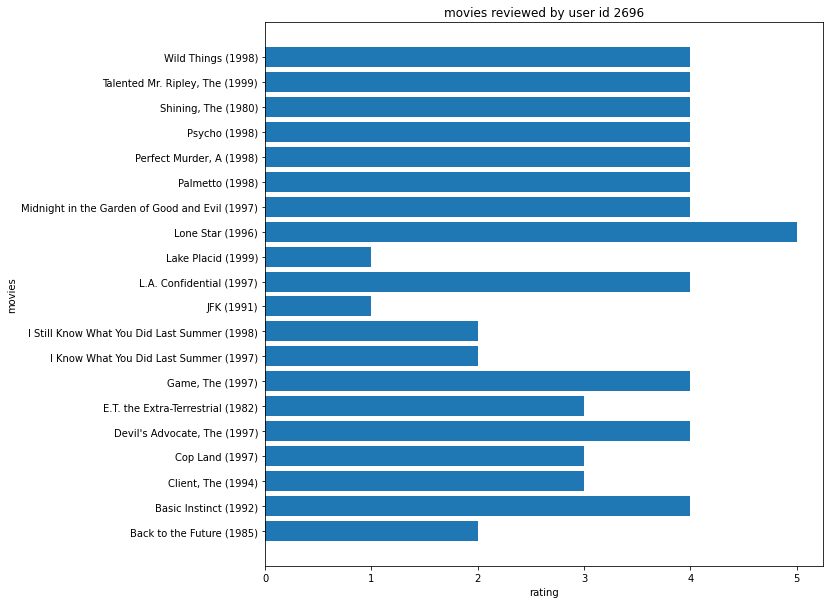

In [112]:
plt.figure(figsize=(10,10))
plt.barh(user_id["Title"],user_id["Rating"])
plt.title("movies reviewed by user id 2696")
plt.xlabel("rating")
plt.ylabel("movies")

In [ ]:
# User rating of the movie “Toy Story”

In [95]:
y.head(2)

,UserID,Gender,Age,Occupation,zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama


In [113]:
i=y.groupby(["Title","Rating","UserID"]).size().reset_index()


In [116]:
y["Title"].unique()

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

In [114]:
i

,Title,Rating,UserID,0
0,"$1,000,000 Duck (1971)",1,869,1
1,"$1,000,000 Duck (1971)",1,1748,1
2,"$1,000,000 Duck (1971)",1,5179,1
3,"$1,000,000 Duck (1971)",2,216,1
4,"$1,000,000 Duck (1971)",2,1635,1
...,...,...,...,...
1000204,eXistenZ (1999),5,5270,1
1000205,eXistenZ (1999),5,5319,1
1000206,eXistenZ (1999),5,5399,1
1000207,eXistenZ (1999),5,5684,1


In [120]:
# toy_story=i.groupby('Title').get_group('Toy Story')

In [119]:
((i['Title'] =="toy story ")).any()

False

In [123]:
((i['Title'] =="Toy Story ")).any()

False